## What does this notebook do?

Experiment 5:

This is a repetition of Experiment 2 - but while running exp 2, there was a bug in the pruning code which resulted in less channels being pruned than intended.
This bug is fixes and now Exp 5 is the same experiment but exp 2 can be considered invalid.

Iterative pruning and finetuning with 0.1 sparsity for each round.
7 rounds of finetuning was done

For experiment 5:
- Plotting validation accuracy on training over 5 rounds of iterative pruning and finetuning

Make chart with x-axis as % pruned, y axis acc
Make chart with acc curve for training/pruning

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
log_results_csv_dir = "log/coco/transpose_r_chsel/jupyter/exp5"
exp5_filelist = list(filter(lambda x: x.endswith("csv"), os.listdir(log_results_csv_dir)))
exp5_filelist.sort()
exp5_filelist

['exp5_step10_finetune_2024-07-17-09-39_train_acc.csv',
 'exp5_step10_finetune_2024-07-17-09-39_train_loss.csv',
 'exp5_step10_finetune_2024-07-17-09-39_val_acc.csv',
 'exp5_step10_finetune_2024-07-17-09-39_val_loss.csv',
 'exp5_step11_finetune_2024-07-17-10-46_train_acc.csv',
 'exp5_step11_finetune_2024-07-17-10-46_train_loss.csv',
 'exp5_step11_finetune_2024-07-17-10-46_val_acc.csv',
 'exp5_step11_finetune_2024-07-17-10-46_val_loss.csv',
 'exp5_step1_finetune_2024-07-16-17-17_train_acc.csv',
 'exp5_step1_finetune_2024-07-16-17-17_train_loss.csv',
 'exp5_step1_finetune_2024-07-16-17-17_val_acc.csv',
 'exp5_step1_finetune_2024-07-16-17-17_val_loss.csv',
 'exp5_step2_finetune_2024-07-16-18-37_train_acc.csv',
 'exp5_step2_finetune_2024-07-16-18-37_train_loss.csv',
 'exp5_step2_finetune_2024-07-16-18-37_val_acc.csv',
 'exp5_step2_finetune_2024-07-16-18-37_val_loss.csv',
 'exp5_step3_finetune_2024-07-16-19-37_train_acc.csv',
 'exp5_step3_finetune_2024-07-16-19-37_train_loss.csv',
 'exp5_st

In [4]:
finetune1_train_csv_path = os.path.join(log_results_csv_dir, 
                                        "exp5_step1_finetune_2024-07-16-17-17_train_acc.csv")
finetune2_train_csv_path = os.path.join(log_results_csv_dir, 
                                        "exp5_step2_finetune_2024-07-16-18-37_train_acc.csv")
finetune3_train_csv_path = os.path.join(log_results_csv_dir, 
                                        "exp5_step3_finetune_2024-07-16-19-37_train_acc.csv")
finetune4_train_csv_path = os.path.join(log_results_csv_dir, 
                                        "exp5_step4_finetune_2024-07-16-20-57_train_acc.csv")
finetune5_train_csv_path = os.path.join(log_results_csv_dir,
                                        "exp5_step5_finetune_2024-07-16-22-56_train_acc.csv")
finetune6_train_csv_path = os.path.join(log_results_csv_dir,
                                         "exp5_step6_finetune_2024-07-17-00-04_train_acc.csv")
finetune7_train_csv_path = os.path.join(log_results_csv_dir,
                                         "exp5_step7_finetune_2024-07-17-01-05_train_acc.csv")

finetune8_train_csv_path = os.path.join(log_results_csv_dir,
                                        'exp5_step8_finetune_2024-07-17-02-06_train_acc.csv')
finetune9_train_csv_path = os.path.join(log_results_csv_dir,
                                        'exp5_step9_finetune_2024-07-17-03-12_train_acc.csv')
finetune10_train_csv_path = os.path.join(log_results_csv_dir,
                                        'exp5_step10_finetune_2024-07-17-09-39_train_acc.csv')
finetune11_train_csv_path = os.path.join(log_results_csv_dir,
                                        'exp5_step11_finetune_2024-07-17-10-46_train_acc.csv')


finetune1_val_csv_path = os.path.join(log_results_csv_dir, 
                                        "exp5_step1_finetune_2024-07-16-17-17_val_acc.csv")
finetune1_val2_csv_path = os.path.join(log_results_csv_dir, 
                                        "exp5_step2_finetune_2024-07-16-18-37_val_acc.csv")
finetune2_val_csv_path = os.path.join(log_results_csv_dir, 
                                        "exp5_step3_finetune_2024-07-16-19-37_val_acc.csv")
finetune3_val_csv_path = os.path.join(log_results_csv_dir, 
                                        "exp5_step3_finetune_2024-07-16-19-37_val_acc.csv")
finetune4_val_csv_path = os.path.join(log_results_csv_dir, 
                                        "exp5_step4_finetune_2024-07-16-20-57_val_acc.csv")
finetune5_val_csv_path = os.path.join(log_results_csv_dir,
                                        "exp5_step5_finetune_2024-07-16-22-56_val_acc.csv")
finetune6_val_csv_path = os.path.join(log_results_csv_dir,
                                        "exp5_step6_finetune_2024-07-17-00-04_val_acc.csv")
finetune7_val_csv_path = os.path.join(log_results_csv_dir,
                                        "exp5_step7_finetune_2024-07-17-01-05_val_acc.csv")
finetune8_val_csv_path = os.path.join(log_results_csv_dir,
                                        'exp5_step8_finetune_2024-07-17-02-06_val_acc.csv')
finetune9_val_csv_path = os.path.join(log_results_csv_dir,
                                        'exp5_step9_finetune_2024-07-17-03-12_val_acc.csv')
finetune10_val_csv_path = os.path.join(log_results_csv_dir,
                                        'exp5_step10_finetune_2024-07-17-09-39_val_acc.csv')
finetune11_val_csv_path = os.path.join(log_results_csv_dir,
                                        'exp5_step11_finetune_2024-07-17-10-46_val_acc.csv')
 

finetune_1_train_acc = pd.read_csv(finetune1_train_csv_path)
finetune_2_train_acc = pd.read_csv(finetune2_train_csv_path)
finetune_3_train_acc = pd.read_csv(finetune3_train_csv_path)
finetune_4_train_acc = pd.read_csv(finetune4_train_csv_path)
finetune_5_train_acc = pd.read_csv(finetune5_train_csv_path)
finetune_6_train_acc = pd.read_csv(finetune6_train_csv_path)
finetune_7_train_acc = pd.read_csv(finetune7_train_csv_path)
finetune_8_train_acc = pd.read_csv(finetune8_train_csv_path)
finetune_9_train_acc = pd.read_csv(finetune9_train_csv_path)
finetune_10_train_acc = pd.read_csv(finetune10_train_csv_path)
finetune_11_train_acc = pd.read_csv(finetune11_train_csv_path)

finetune_1_val_acc = pd.read_csv(finetune1_val_csv_path)
finetune_2_val_acc = pd.read_csv(finetune2_val_csv_path)
finetune_3_val_acc = pd.read_csv(finetune3_val_csv_path)
finetune_4_val_acc = pd.read_csv(finetune4_val_csv_path)
finetune_5_val_acc = pd.read_csv(finetune5_val_csv_path)
finetune_6_val_acc = pd.read_csv(finetune6_val_csv_path)
finetune_7_val_acc = pd.read_csv(finetune7_val_csv_path)
finetune_8_val_acc = pd.read_csv(finetune8_val_csv_path)
finetune_9_val_acc = pd.read_csv(finetune9_val_csv_path)
finetune_10_val_acc = pd.read_csv(finetune10_val_csv_path)
finetune_11_val_acc = pd.read_csv(finetune11_val_csv_path)

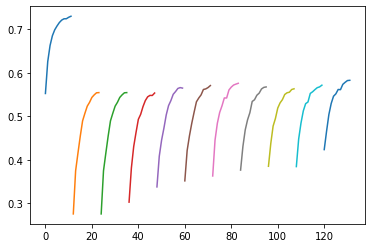

In [6]:
plt.plot(finetune_1_val_acc['Step'], finetune_1_val_acc['Value'])
plt.plot(finetune_2_val_acc['Step']+12, finetune_2_val_acc['Value'])
plt.plot(finetune_3_val_acc['Step']+12*2, finetune_3_val_acc['Value'])
plt.plot(finetune_4_val_acc['Step']+12*3, finetune_4_val_acc['Value'])
plt.plot(finetune_5_val_acc['Step']+12*4, finetune_5_val_acc['Value'])
plt.plot(finetune_6_val_acc['Step']+12*5, finetune_6_val_acc['Value'])
plt.plot(finetune_7_val_acc['Step']+12*6, finetune_7_val_acc['Value'])
plt.plot(finetune_8_val_acc['Step']+12*7, finetune_8_val_acc['Value'])
plt.plot(finetune_9_val_acc['Step']+12*8, finetune_9_val_acc['Value'])
plt.plot(finetune_10_val_acc['Step']+12*9, finetune_10_val_acc['Value'])
plt.plot(finetune_11_val_acc['Step']+12*10, finetune_11_val_acc['Value'])

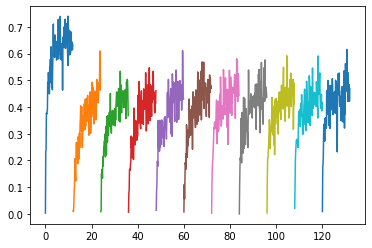

In [7]:
plt.plot(finetune_1_train_acc['Step']/(84/12.0), finetune_1_train_acc['Value'])
plt.plot(finetune_2_train_acc['Step']/(84/12.0)+12, finetune_2_train_acc['Value'])
plt.plot(finetune_3_train_acc['Step']/(84/12.0)+12*2, finetune_3_train_acc['Value'])
plt.plot(finetune_4_train_acc['Step']/(84/12.0)+12*3, finetune_4_train_acc['Value'])
plt.plot(finetune_5_train_acc['Step']/(84/12.0)+12*4, finetune_5_train_acc['Value'])
plt.plot(finetune_6_train_acc['Step']/(84/12.0)+12*5, finetune_6_train_acc['Value'])
plt.plot(finetune_7_train_acc['Step']/(84/12.0)+12*6, finetune_7_train_acc['Value'])
plt.plot(finetune_8_train_acc['Step']/(84/12.0)+12*7, finetune_8_train_acc['Value'])
plt.plot(finetune_9_train_acc['Step']/(84/12.0)+12*8, finetune_9_train_acc['Value'])
plt.plot(finetune_10_train_acc['Step']/(84/12.0)+12*9, finetune_10_train_acc['Value'])
plt.plot(finetune_11_train_acc['Step']/(84/12.0)+12*10, finetune_11_train_acc['Value'])

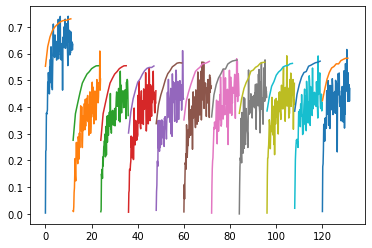

In [8]:
plt.plot(finetune_1_train_acc['Step']/(84/12.0), finetune_1_train_acc['Value'])
plt.plot(finetune_2_train_acc['Step']/(84/12.0)+12, finetune_2_train_acc['Value'])
plt.plot(finetune_3_train_acc['Step']/(84/12.0)+12*2, finetune_3_train_acc['Value'])
plt.plot(finetune_4_train_acc['Step']/(84/12.0)+12*3, finetune_4_train_acc['Value'])
plt.plot(finetune_5_train_acc['Step']/(84/12.0)+12*4, finetune_5_train_acc['Value'])
plt.plot(finetune_6_train_acc['Step']/(84/12.0)+12*5, finetune_6_train_acc['Value'])
plt.plot(finetune_7_train_acc['Step']/(84/12.0)+12*6, finetune_7_train_acc['Value'])
plt.plot(finetune_8_train_acc['Step']/(84/12.0)+12*7, finetune_8_train_acc['Value'])
plt.plot(finetune_9_train_acc['Step']/(84/12.0)+12*8, finetune_9_train_acc['Value'])
plt.plot(finetune_10_train_acc['Step']/(84/12.0)+12*9, finetune_10_train_acc['Value'])
plt.plot(finetune_11_train_acc['Step']/(84/12.0)+12*10, finetune_11_train_acc['Value'])

plt.plot(finetune_1_val_acc['Step'], finetune_1_val_acc['Value'])
plt.plot(finetune_2_val_acc['Step']+12, finetune_2_val_acc['Value'])
plt.plot(finetune_3_val_acc['Step']+12*2, finetune_3_val_acc['Value'])
plt.plot(finetune_4_val_acc['Step']+12*3, finetune_4_val_acc['Value'])
plt.plot(finetune_5_val_acc['Step']+12*4, finetune_5_val_acc['Value'])
plt.plot(finetune_6_val_acc['Step']+12*5, finetune_6_val_acc['Value'])
plt.plot(finetune_7_val_acc['Step']+12*6, finetune_7_val_acc['Value'])
plt.plot(finetune_8_val_acc['Step']+12*7, finetune_8_val_acc['Value'])
plt.plot(finetune_9_val_acc['Step']+12*8, finetune_9_val_acc['Value'])
plt.plot(finetune_10_val_acc['Step']+12*9, finetune_10_val_acc['Value'])
plt.plot(finetune_11_val_acc['Step']+12*10, finetune_11_val_acc['Value'])


In [9]:
finetune1_train_loss_csv_path = os.path.join(log_results_csv_dir, 
                                        "exp5_step1_finetune_2024-07-16-17-17_train_loss.csv")
finetune2_train_loss_csv_path = os.path.join(log_results_csv_dir, 
                                        "exp5_step2_finetune_2024-07-16-18-37_train_loss.csv")
finetune3_train_loss_csv_path = os.path.join(log_results_csv_dir, 
                                        "exp5_step3_finetune_2024-07-16-19-37_train_loss.csv")
finetune4_train_loss_csv_path = os.path.join(log_results_csv_dir, 
                                        "exp5_step4_finetune_2024-07-16-20-57_train_loss.csv")
finetune5_train_loss_csv_path = os.path.join(log_results_csv_dir, 
                                        "exp5_step5_finetune_2024-07-16-22-56_train_loss.csv")
finetune6_train_loss_csv_path = os.path.join(log_results_csv_dir, 
                                        "exp5_step6_finetune_2024-07-17-00-04_train_loss.csv")
finetune7_train_loss_csv_path = os.path.join(log_results_csv_dir, 
                                        "exp5_step7_finetune_2024-07-17-01-05_train_loss.csv")
finetune8_train_loss_csv_path = os.path.join(log_results_csv_dir, 
                                        'exp5_step8_finetune_2024-07-17-02-06_train_loss.csv')
finetune9_train_loss_csv_path = os.path.join(log_results_csv_dir, 
                                        'exp5_step9_finetune_2024-07-17-03-12_train_loss.csv')
finetune10_train_loss_csv_path = os.path.join(log_results_csv_dir, 
                                        'exp5_step10_finetune_2024-07-17-09-39_train_loss.csv')
finetune11_train_loss_csv_path = os.path.join(log_results_csv_dir, 
                                        'exp5_step11_finetune_2024-07-17-10-46_train_loss.csv')


finetune1_val_loss_csv_path = os.path.join(log_results_csv_dir, 
                                        "exp5_step1_finetune_2024-07-16-17-17_val_loss.csv")
finetune2_val_loss_csv_path = os.path.join(log_results_csv_dir, 
                                        "exp5_step2_finetune_2024-07-16-18-37_val_loss.csv")
finetune3_val_loss_csv_path = os.path.join(log_results_csv_dir, 
                                        "exp5_step3_finetune_2024-07-16-19-37_val_loss.csv")
finetune4_val_loss_csv_path = os.path.join(log_results_csv_dir, 
                                        "exp5_step4_finetune_2024-07-16-20-57_val_loss.csv")
finetune5_val_loss_csv_path = os.path.join(log_results_csv_dir, 
                                        "exp5_step5_finetune_2024-07-16-22-56_val_loss.csv")
finetune6_val_loss_csv_path = os.path.join(log_results_csv_dir, 
                                        "exp5_step6_finetune_2024-07-17-00-04_val_loss.csv")
finetune7_val_loss_csv_path = os.path.join(log_results_csv_dir, 
                                        "exp5_step7_finetune_2024-07-17-01-05_val_loss.csv")
finetune8_val_loss_csv_path = os.path.join(log_results_csv_dir, 
                                        'exp5_step8_finetune_2024-07-17-02-06_val_loss.csv')
finetune9_val_loss_csv_path = os.path.join(log_results_csv_dir, 
                                        'exp5_step9_finetune_2024-07-17-03-12_val_loss.csv')
finetune10_val_loss_csv_path = os.path.join(log_results_csv_dir, 
                                        'exp5_step10_finetune_2024-07-17-09-39_val_loss.csv')
finetune11_val_loss_csv_path = os.path.join(log_results_csv_dir, 
                                        'exp5_step11_finetune_2024-07-17-10-46_val_loss.csv')

finetune_1_train_loss = pd.read_csv(finetune1_train_loss_csv_path)
finetune_2_train_loss = pd.read_csv(finetune2_train_loss_csv_path)
finetune_3_train_loss = pd.read_csv(finetune3_train_loss_csv_path)
finetune_4_train_loss = pd.read_csv(finetune4_train_loss_csv_path)
finetune_5_train_loss = pd.read_csv(finetune5_train_loss_csv_path)
finetune_6_train_loss = pd.read_csv(finetune6_train_loss_csv_path)
finetune_7_train_loss = pd.read_csv(finetune7_train_loss_csv_path)
finetune_8_train_loss = pd.read_csv(finetune8_train_loss_csv_path)
finetune_9_train_loss = pd.read_csv(finetune9_train_loss_csv_path)
finetune_10_train_loss = pd.read_csv(finetune10_train_loss_csv_path)
finetune_11_train_loss = pd.read_csv(finetune11_train_loss_csv_path)

finetune_1_val_loss = pd.read_csv(finetune1_val_loss_csv_path)
finetune_2_val_loss = pd.read_csv(finetune2_val_loss_csv_path)
finetune_3_val_loss = pd.read_csv(finetune3_val_loss_csv_path)
finetune_4_val_loss = pd.read_csv(finetune4_val_loss_csv_path)
finetune_5_val_loss = pd.read_csv(finetune5_val_loss_csv_path)
finetune_6_val_loss = pd.read_csv(finetune6_val_loss_csv_path)
finetune_7_val_loss = pd.read_csv(finetune7_val_loss_csv_path)
finetune_8_val_loss = pd.read_csv(finetune8_val_loss_csv_path)
finetune_9_val_loss = pd.read_csv(finetune9_val_loss_csv_path)
finetune_10_val_loss = pd.read_csv(finetune10_val_loss_csv_path)
finetune_11_val_loss = pd.read_csv(finetune11_val_loss_csv_path)

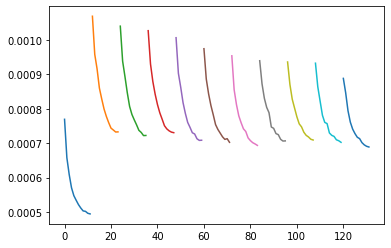

In [10]:
plt.plot(finetune_1_val_loss['Step'], finetune_1_val_loss['Value'])
plt.plot(finetune_2_val_loss['Step']+12, finetune_2_val_loss['Value'])
plt.plot(finetune_3_val_loss['Step']+12*2, finetune_3_val_loss['Value'])
plt.plot(finetune_4_val_loss['Step']+12*3, finetune_4_val_loss['Value'])
plt.plot(finetune_5_val_loss['Step']+12*4, finetune_5_val_loss['Value'])
plt.plot(finetune_6_val_loss['Step']+12*5, finetune_6_val_loss['Value'])
plt.plot(finetune_7_val_loss['Step']+12*6, finetune_7_val_loss['Value'])
plt.plot(finetune_8_val_loss['Step']+12*7, finetune_8_val_loss['Value'])
plt.plot(finetune_9_val_loss['Step']+12*8, finetune_9_val_loss['Value'])
plt.plot(finetune_10_val_loss['Step']+12*9, finetune_10_val_loss['Value'])
plt.plot(finetune_11_val_loss['Step']+12*10, finetune_11_val_loss['Value'])


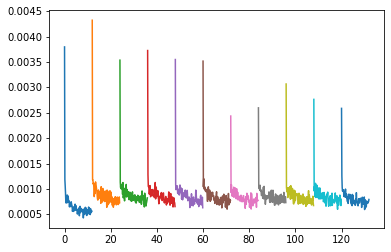

In [11]:
fig, axs = plt.subplots()
axs.plot(finetune_1_train_loss['Step']/(84/12.0), finetune_1_train_loss['Value'])
axs.plot(finetune_2_train_loss['Step']/(84/12.0)+12, finetune_2_train_loss['Value'])
axs.plot(finetune_3_train_loss['Step']/(84/12.0)+12*2, finetune_3_train_loss['Value'])
axs.plot(finetune_4_train_loss['Step']/(84/12.0)+12*3, finetune_4_train_loss['Value'])
axs.plot(finetune_5_train_loss['Step']/(84/12.0)+12*4, finetune_5_train_loss['Value'])
axs.plot(finetune_6_train_loss['Step']/(84/12.0)+12*5, finetune_6_train_loss['Value'])
axs.plot(finetune_7_train_loss['Step']/(84/12.0)+12*6, finetune_7_train_loss['Value'])
axs.plot(finetune_8_train_loss['Step']/(84/12.0)+12*7, finetune_8_train_loss['Value'])
axs.plot(finetune_9_train_loss['Step']/(84/12.0)+12*8, finetune_9_train_loss['Value'])
axs.plot(finetune_10_train_loss['Step']/(84/12.0)+12*9, finetune_10_train_loss['Value'])
axs.plot(finetune_11_train_loss['Step']/(84/12.0)+12*10, finetune_11_train_loss['Value'])
# axs.set_yscale('log')

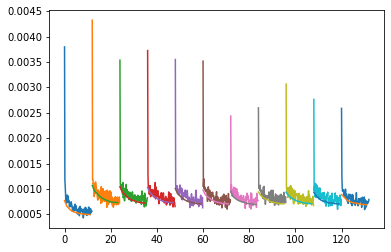

In [13]:
fig, axs = plt.subplots()
axs.plot(finetune_1_train_loss['Step']/(84/12.0), finetune_1_train_loss['Value'])
axs.plot(finetune_2_train_loss['Step']/(84/12.0)+12, finetune_2_train_loss['Value'])
axs.plot(finetune_3_train_loss['Step']/(84/12.0)+12*2, finetune_3_train_loss['Value'])
axs.plot(finetune_4_train_loss['Step']/(84/12.0)+12*3, finetune_4_train_loss['Value'])
axs.plot(finetune_5_train_loss['Step']/(84/12.0)+12*4, finetune_5_train_loss['Value'])
axs.plot(finetune_6_train_loss['Step']/(84/12.0)+12*5, finetune_6_train_loss['Value'])
axs.plot(finetune_7_train_loss['Step']/(84/12.0)+12*6, finetune_7_train_loss['Value'])
axs.plot(finetune_8_train_loss['Step']/(84/12.0)+12*7, finetune_8_train_loss['Value'])
axs.plot(finetune_9_train_loss['Step']/(84/12.0)+12*8, finetune_9_train_loss['Value'])
axs.plot(finetune_10_train_loss['Step']/(84/12.0)+12*9, finetune_10_train_loss['Value'])
axs.plot(finetune_11_train_loss['Step']/(84/12.0)+12*10, finetune_11_train_loss['Value'])

axs.plot(finetune_1_val_loss['Step'], finetune_1_val_loss['Value'])
axs.plot(finetune_2_val_loss['Step']+12, finetune_2_val_loss['Value'])
axs.plot(finetune_3_val_loss['Step']+12*2, finetune_3_val_loss['Value'])
axs.plot(finetune_4_val_loss['Step']+12*3, finetune_4_val_loss['Value'])
axs.plot(finetune_5_val_loss['Step']+12*4, finetune_5_val_loss['Value'])
axs.plot(finetune_6_val_loss['Step']+12*5, finetune_6_val_loss['Value'])
axs.plot(finetune_7_val_loss['Step']+12*6, finetune_7_val_loss['Value'])
axs.plot(finetune_8_val_loss['Step']+12*7, finetune_8_val_loss['Value'])
axs.plot(finetune_9_val_loss['Step']+12*8, finetune_9_val_loss['Value'])
axs.plot(finetune_10_val_loss['Step']+12*9, finetune_10_val_loss['Value'])
axs.plot(finetune_11_val_loss['Step']+12*10, finetune_11_val_loss['Value'])

In [14]:
model_size_iter = {}
model_acc_iter = {}
model_size_iter[0] = 4735825 # size of original model
model_size_iter[1] = 4605918 # size after 1 round(s) of pruning
model_size_iter[2] = 4476708 # size after 2 round(s) of pruning
model_size_iter[3] = 4376520
model_size_iter[4] = 4295517
model_size_iter[5] = 4220238
model_size_iter[6] = 4147165
model_size_iter[7] = 4082626
model_size_iter[8] = 4028562
model_size_iter[9] = 3987670
model_size_iter[10] = 3958666
model_size_iter[11] = 3931900

model_acc_iter[0] = 0.75
model_acc_iter[1] = finetune_1_val_acc['Value'][-1:]
model_acc_iter[2] = finetune_2_val_acc['Value'][-1:]
model_acc_iter[3] = finetune_3_val_acc['Value'][-1:]
model_acc_iter[4] = finetune_4_val_acc['Value'][-1:]
model_acc_iter[5] = finetune_5_val_acc['Value'][-1:]
model_acc_iter[6] = finetune_6_val_acc['Value'][-1:]
model_acc_iter[7] = finetune_7_val_acc['Value'][-1:]
model_acc_iter[8] = finetune_8_val_acc['Value'][-1:]
model_acc_iter[9] = finetune_9_val_acc['Value'][-1:]
model_acc_iter[10] = finetune_10_val_acc['Value'][-1:]
model_acc_iter[11] = finetune_11_val_acc['Value'][-1:]

In [29]:
finetune_1_2_val_acc['Value'][-1:]

16    0.713819
Name: Value, dtype: float64

0 4735825 0.0
1 4605918 0.02743070109220669
2 4476708 0.054714226138001254
3 4376520 0.07586956866015948
4 4295517 0.09297387466808849
5 4220238 0.10886952114995807
6 4147165 0.12429935650071533
7 4082626 0.13792718269784043
8 4028562 0.14934314506976076
9 3987670 0.15797775466787733
10 3958666 0.16410213637539395
11 3931900 0.1697539499453633


Text(0.5, 0, 'Sparsity')

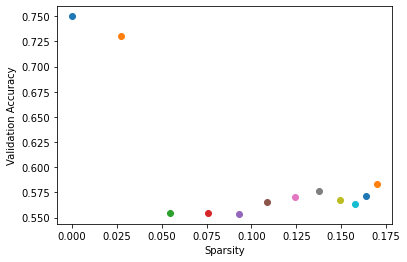

In [15]:
fig, axs = plt.subplots()
for i in range(12):
    print(i, model_size_iter[i], 1 - model_size_iter[i]/model_size_iter[0])
    axs.scatter(1 - model_size_iter[i]/model_size_iter[0], model_acc_iter[i])
axs.set_ylabel("Validation Accuracy")
axs.set_xlabel("Sparsity")
# axs.set_ylim(0,0.8)
# axs.set_xlim(-0.03, 0.3)

0 1444928 1.0
1 1315021 0.910094482216415
2 1185811 0.8206713414093989
3 1085623 0.7513336304646322
4 1004620 0.6952733977056296
5 929341 0.6431746080081499
6 856268 0.5926025379811313
7 791729 0.5479366445940559
8 737665 0.5105202473756478
9 696773 0.48221987531558663
10 667769 0.4621469028214555
11 641003 0.44362279642999514


Text(0.5, 0, 'Sparsity (only conv layers)')

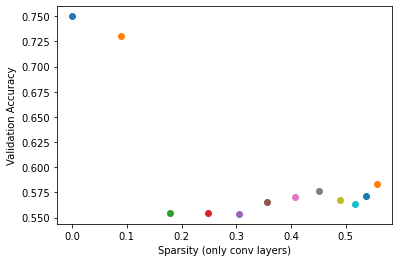

In [16]:
model_part1_size = 1444928

fig, axs = plt.subplots()
for i in range(12):
    print(i, model_part1_size - (model_size_iter[0] - model_size_iter[i]), 
          (model_part1_size - (model_size_iter[0] - model_size_iter[i])) /model_part1_size)
    axs.scatter(1 -((model_part1_size - (model_size_iter[0] - model_size_iter[i])) /model_part1_size)
                , model_acc_iter[i])
axs.set_ylabel("Validation Accuracy")
axs.set_xlabel("Sparsity (only conv layers)")

In [41]:
finetune_1_acc['Value'][11]

0.7502899765968323

In [32]:
import numpy as np

In [63]:
prune_i = {}
prune_i[0] = np.asarray([64, 64, 64, 64, 64, 64, 128, 128, 128, 128, 128, 128, 128, 128])
prune_i[1] = np.asarray([33, 31, 39, 52, 50, 62, 117, 119,  38,  95,  93, 113,  90, 123])
prune_i[2] = np.asarray([32, 22, 31, 35, 36, 59, 105,  98,  17,  55,  61,  89,  57,  94])
prune_i[3] = np.asarray([13, 16, 12, 29, 19, 59,  81,  88,   1,  51,  22,  87,  26,  89])
prune_i[4] = np.asarray([12, 13,  5, 21,  9, 56,  49,  76,   1,  39,   8,  66,   8,  82])
prune_i[5] = np.asarray([ 1, 12,  5, 17,  9, 50,  30,  54,   1,  30,   8,  44,   8,  72])
prune_i[6] = np.asarray([ 1,  9,  5, 11,  9, 44,  17,  38,   1,  23,   8,  31,   8,  58])
prune_i[7 ]= [ 1,  9,  5,  7,  9, 35,  11,  32,   1,  20,   8,  17,   8,  44]


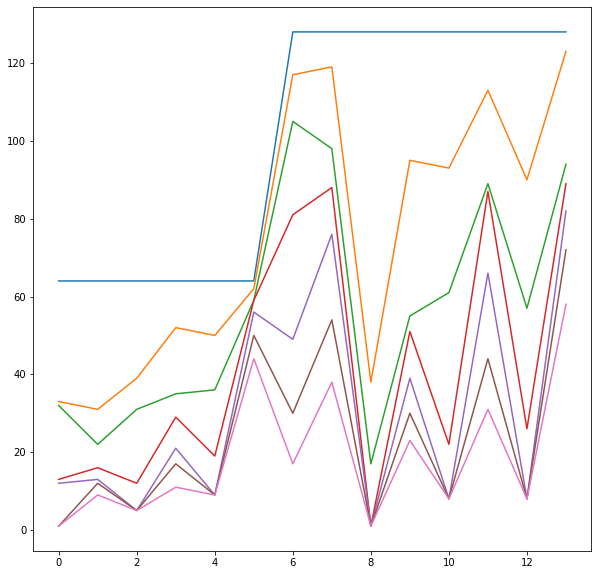

In [64]:
fig, axs = plt.subplots(figsize=(10,10))
for i in range(7):
    plt.plot( prune_i[i])

In [66]:
print("BN initial num wts: ", np.sum(prune_i[0]))
for i in range(1,8):
    print(i, np.sum(prune_i[i]), round(np.sum(prune_i[i])/ np.sum(prune_i[i-1]),3), round(np.sum(prune_i[i])/ np.sum(prune_i[0]), 3))



BN initial num wts:  1408
1 1055 0.749 0.749
2 791 0.75 0.562
3 593 0.75 0.421
4 445 0.75 0.316
5 341 0.766 0.242
6 263 0.771 0.187
7 207 0.787 0.147


In [13]:
round_i = 0
orig = 1.0
cur_fullness = orig
while round_i < 8:
    cur_fullness = 0.75 * cur_fullness
    print(round_i, round(cur_fullness, 3))
    round_i += 1

0 0.75
1 0.562
2 0.422
3 0.316
4 0.237
5 0.178
6 0.133
7 0.1


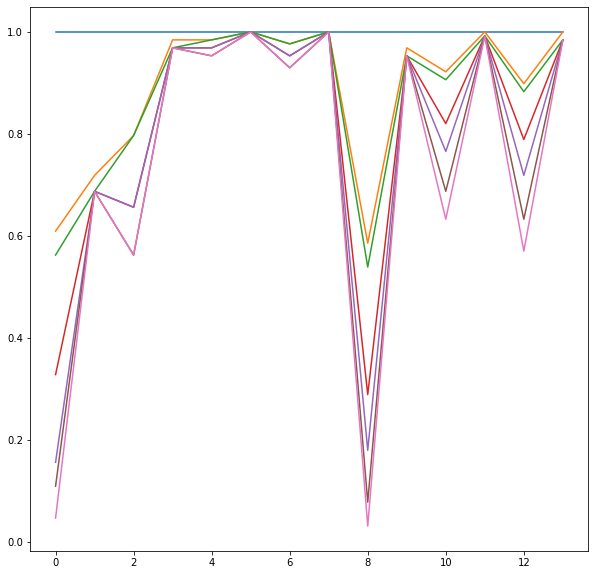

In [8]:
fig, axs = plt.subplots(figsize=(10,10))
plt.plot(prune_0/prune_0)
plt.plot(prune_1/prune_0)
plt.plot(prune_2/prune_0)
plt.plot(prune_3/prune_0)
plt.plot(prune_4/prune_0)
plt.plot(prune_5/prune_0)
plt.plot(prune_6/prune_0)

### Model size using torchsummary

In [4]:
model_size_params = {}
model_size_params[0] =  4735825
model_size_params[1] =  4398782
model_size_params[2] = 4158662
model_size_params[3] = 4029203
model_size_params[4] = 3932515
model_size_params[5] = 3874012
model_size_params[6] = 3832886


(0.0, 5682990.0)

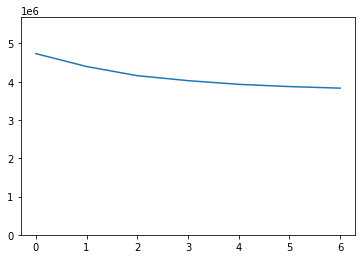

In [7]:
fig, axs = plt.subplots()
axs.plot(range(7), model_size_params.values())
axs.set_ylim(0, model_size_params[0]*1.2)

(0.7, 1.05)

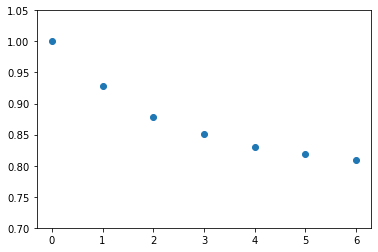

In [16]:
fig, axs = plt.subplots()
axs.scatter(range(7), list(map(lambda x: x/model_size_params[0], model_size_params.values())))
axs.set_ylim(0.7, 1.05)